# **CIS 5450 Final Project - Cardiovascular Diseases Prediction**
*Justin Zhaoying Lu, Tengxiao Song, Qingxuan Wu*

# Part 1: Introduction

Our project centers on the development of a predictive model for estimating Cardiovascular Disease (CVD) risk by leveraging the Cardiovascular Diseases Risk Prediction Dataset. This dataset encompasses various lifestyle choices and physical characteristics, including exercises, depression, smoking history, alcohol consumption, height, sex, and age. Through the utilization of this dataset, we aim to cultivate a holistic understanding of the intricate interplay between lifestyle choices, physical attributes, and the likelihood of developing Cardiovascular Diseases.

This project is intriguing due to its potential public health impact, offering the ability to inform early intervention and prevention strategies for CVDs which are a significant health concern.
By leveraging data-driven insights from a diverse sample of over 300,000 instances, the study aims to empower individuals with valuable information to make more informed decisions on life habits and enhance overall cardiovascular health.

The results of our analyses are documented in the notebook below. For each relevant visualization or finding, we provide the rationale for the analysis, key takeaways, and insights into the relationships among different features and CVD risk rates.


We hope you find our findings insightful, and are eager to answer any questions you may have.

# Part 2: Data Loading & Preprocessing


##2.1 Imports + Installs


For this step, we aimed to import the relevant libraries for all stages of our report (pre-processing, exploratory data analysis (EDA), and modeling). These imports primarily include fundamental libraries such as pandas, matplotlib, seaborn, numpy, and sklearn.

In [1]:
# Imports + Installs
!pip install category_encoders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import xgboost as xgb

from xgboost import XGBRegressor
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 869.9 kB/s eta 0:00:00


## 2.2 Loading Data & Converting to Dataframe

To enhance accessibility for others to run our notebook, we have uploaded the dataset to GitHub. This approach eliminates the need for manual file saving to the working directory, providing a more convenient and streamlined process.

In [2]:
# Data loading via GitHub
github_url = 'https://raw.githubusercontent.com/tengxiao-song/CVD/main/CVD_cleaned.csv'
cvd_df = pd.read_csv(github_url)

##2.3 Analyzing Data Structure

In [3]:
# Dataframe column datatypes
cvd_df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [4]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [5]:
numerical = cvd_df.select_dtypes(include=['float64']).columns.sort_values()
categorical = cvd_df.select_dtypes(include=['object']).columns.sort_values()
cvd_df = cvd_df.sort_values(by='Age_Category').reset_index(drop=True)
## Printing the length of numerical and categorical. The total length should have
## the same length as our dataframe
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 7 Numerical variables


In [6]:
# First 5 tuples of data
cvd_df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Excellent,Within the past 5 years,No,No,No,No,Yes,No,No,Male,18-24,178.0,68.04,21.52,No,25.0,4.0,0.0,1.0
1,Excellent,Never,Yes,No,No,No,Yes,No,Yes,Male,18-24,193.0,120.20,32.26,Yes,1.0,60.0,4.0,12.0
2,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,160.0,49.90,19.49,No,0.0,0.0,1.0,0.0
3,Good,Within the past 5 years,Yes,No,No,No,Yes,No,No,Female,18-24,168.0,68.04,24.21,No,0.0,60.0,7.0,1.0
4,Very Good,Within the past year,No,No,No,No,No,No,No,Male,18-24,173.0,72.57,24.33,No,1.0,90.0,4.0,16.0


##2.4 Dropping Insignificant Columns + Null Rows + Duplicate Rows

Dropping `General_Health` column: We dropped this column because of its potential redundancy with other features in the dataset might introduce multicollinearity, complicating the model's ability to discern independent contributions. Additionally, given the subjective nature of "general health" and its potential variation across individuals, removing it ensures reliance on more objectively measured and consistently defined quantifiable features.

In [7]:
# Dropping General_Health column
cvd_df = cvd_df.drop(["General_Health"], axis = 1)

Dropping `Checkup` column: This column was excluded from our analysis due to the vagueness associated with its values, such as '5 or more years ago' and 'Within the past 5 years.' The inherent ambiguity in the temporal descriptions could introduce uncertainty into the model, making it challenging to derive precise insights.

In [8]:
cvd_df["Checkup"].unique()

array(['Within the past 5 years', 'Never', 'Within the past year',
       'Within the past 2 years', '5 or more years ago'], dtype=object)

In [9]:
cvd_df = cvd_df.drop(["Checkup"], axis = 1)

In [10]:
#Rename the columns for Height and Weight for simplicity
cvd_df = cvd_df.rename(columns={"Height_(cm)":"Height","Weight_(kg)":"Weight"})

In [11]:
#Although this is a very clean dataset, just making sure no nulls still left.
null_values = cvd_df.isnull().sum()
null_values

Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height                          0
Weight                          0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [12]:
#check and drop duplicate values
cvd_df.duplicated().sum()
cvd_df = cvd_df.drop_duplicates()

To promote data consistency within categorical features, where each value is expected to be either `Yes` or `No` (and `Male` or `Female` for the `Sex` feature), an assessment was conducted. During this evaluation, anomalies were identified in the `Diabetes` column, in which the values are not purely binary.

In [13]:
columns_of_interest = ['Exercise',	'Heart_Disease',	'Skin_Cancer',	'Other_Cancer',	'Depression',	'Diabetes',	'Sex', 'Arthritis', 'Smoking_History']
unique_values = cvd_df[columns_of_interest].apply(lambda x: x.unique())
unique_values

Exercise                                                   [No, Yes]
Heart_Disease                                              [No, Yes]
Skin_Cancer                                                [No, Yes]
Other_Cancer                                               [No, Yes]
Depression                                                 [Yes, No]
Diabetes           [No, No, pre-diabetes or borderline diabetes, ...
Sex                                                   [Male, Female]
Arthritis                                                  [No, Yes]
Smoking_History                                            [No, Yes]
dtype: object

After checking the number of tuples with values other than `Yes` or `No` in the `Diabetes` column, we made the decision to enhance data quality by removing rows with incorrect formats in the `Diabetes` column, given the considerable sample size compared with the size of the tuples to be discarded.

In [14]:
cvd_df['Diabetes'].value_counts(normalize=True)

No                                            0.838855
Yes                                           0.130211
No, pre-diabetes or borderline diabetes       0.022356
Yes, but female told only during pregnancy    0.008578
Name: Diabetes, dtype: float64

In [15]:
cvd_df = cvd_df[cvd_df['Diabetes'].isin(['Yes', 'No'])]

We have decided to maintain the categorical features as 'Yes' and 'No' during Exploratory Data Analysis (EDA) to ensure clarity in communication. This choice is driven by the desire to preserve interpretability and enhance contextual understanding, particularly in visualizations. The decision acknowledges that the original labels carry meaningful information and contribute to a more intuitive interpretation of the data in graphical representations.  We will transform and process the dataset again before modeling.

#Part 3: Exploratory Data Analysis

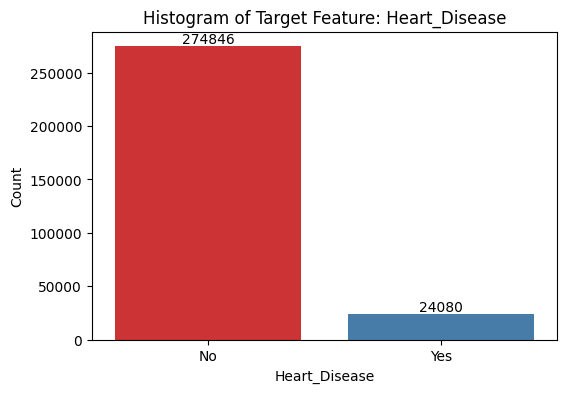

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Heart_Disease', data=cvd_df, palette='Set1')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{count}',
            ha='center', va='bottom', fontsize=10, color='black')
plt.title('Histogram of Target Feature: Heart_Disease')
plt.xlabel('Heart_Disease')
plt.ylabel('Count')
plt.show()

Takeaways: The `Heart_Disease` target feature displays an imbalanced distribution, with 274,846 instances labeled 'No' and 24,080 instances labeled 'Yes.' This class imbalance may pose challenges to the performance of machine learning models. Since we are unable to collect more data to resolve this issue at the moment, we have chosen to address this issue by prioritizing the use of AUROC (Area Under the Receiver Operating Characteristic (ROC) curve) over accuracy as our primary evaluation metric. AUROC offers a robust measure of a model's discriminative ability between positive and negative instances, making it a more apt choice in scenarios characterized by imbalanced class distributions.

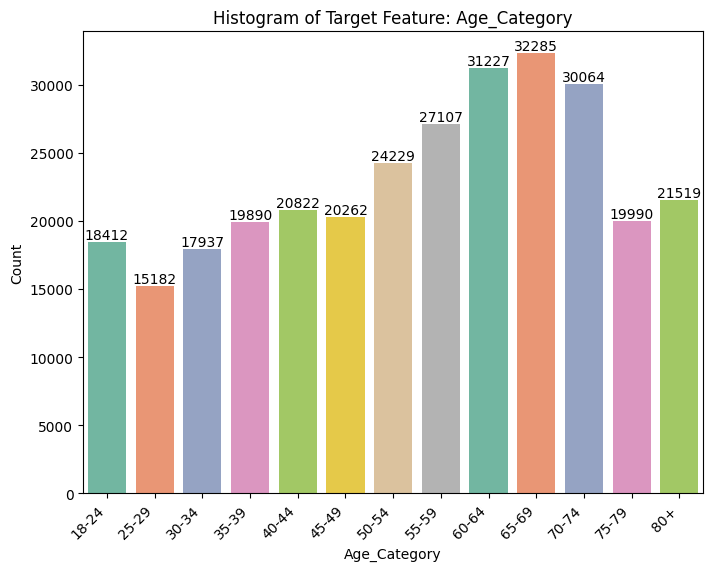

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Age_Category', data=cvd_df, palette='Set2')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{count}',
            ha='center', va='bottom', fontsize=10, color='black')
plt.title('Histogram of Target Feature: Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Takeaways: The distribution of `age_category`is left skewed, with a peak concentration observed between the ages of 50 and 74.

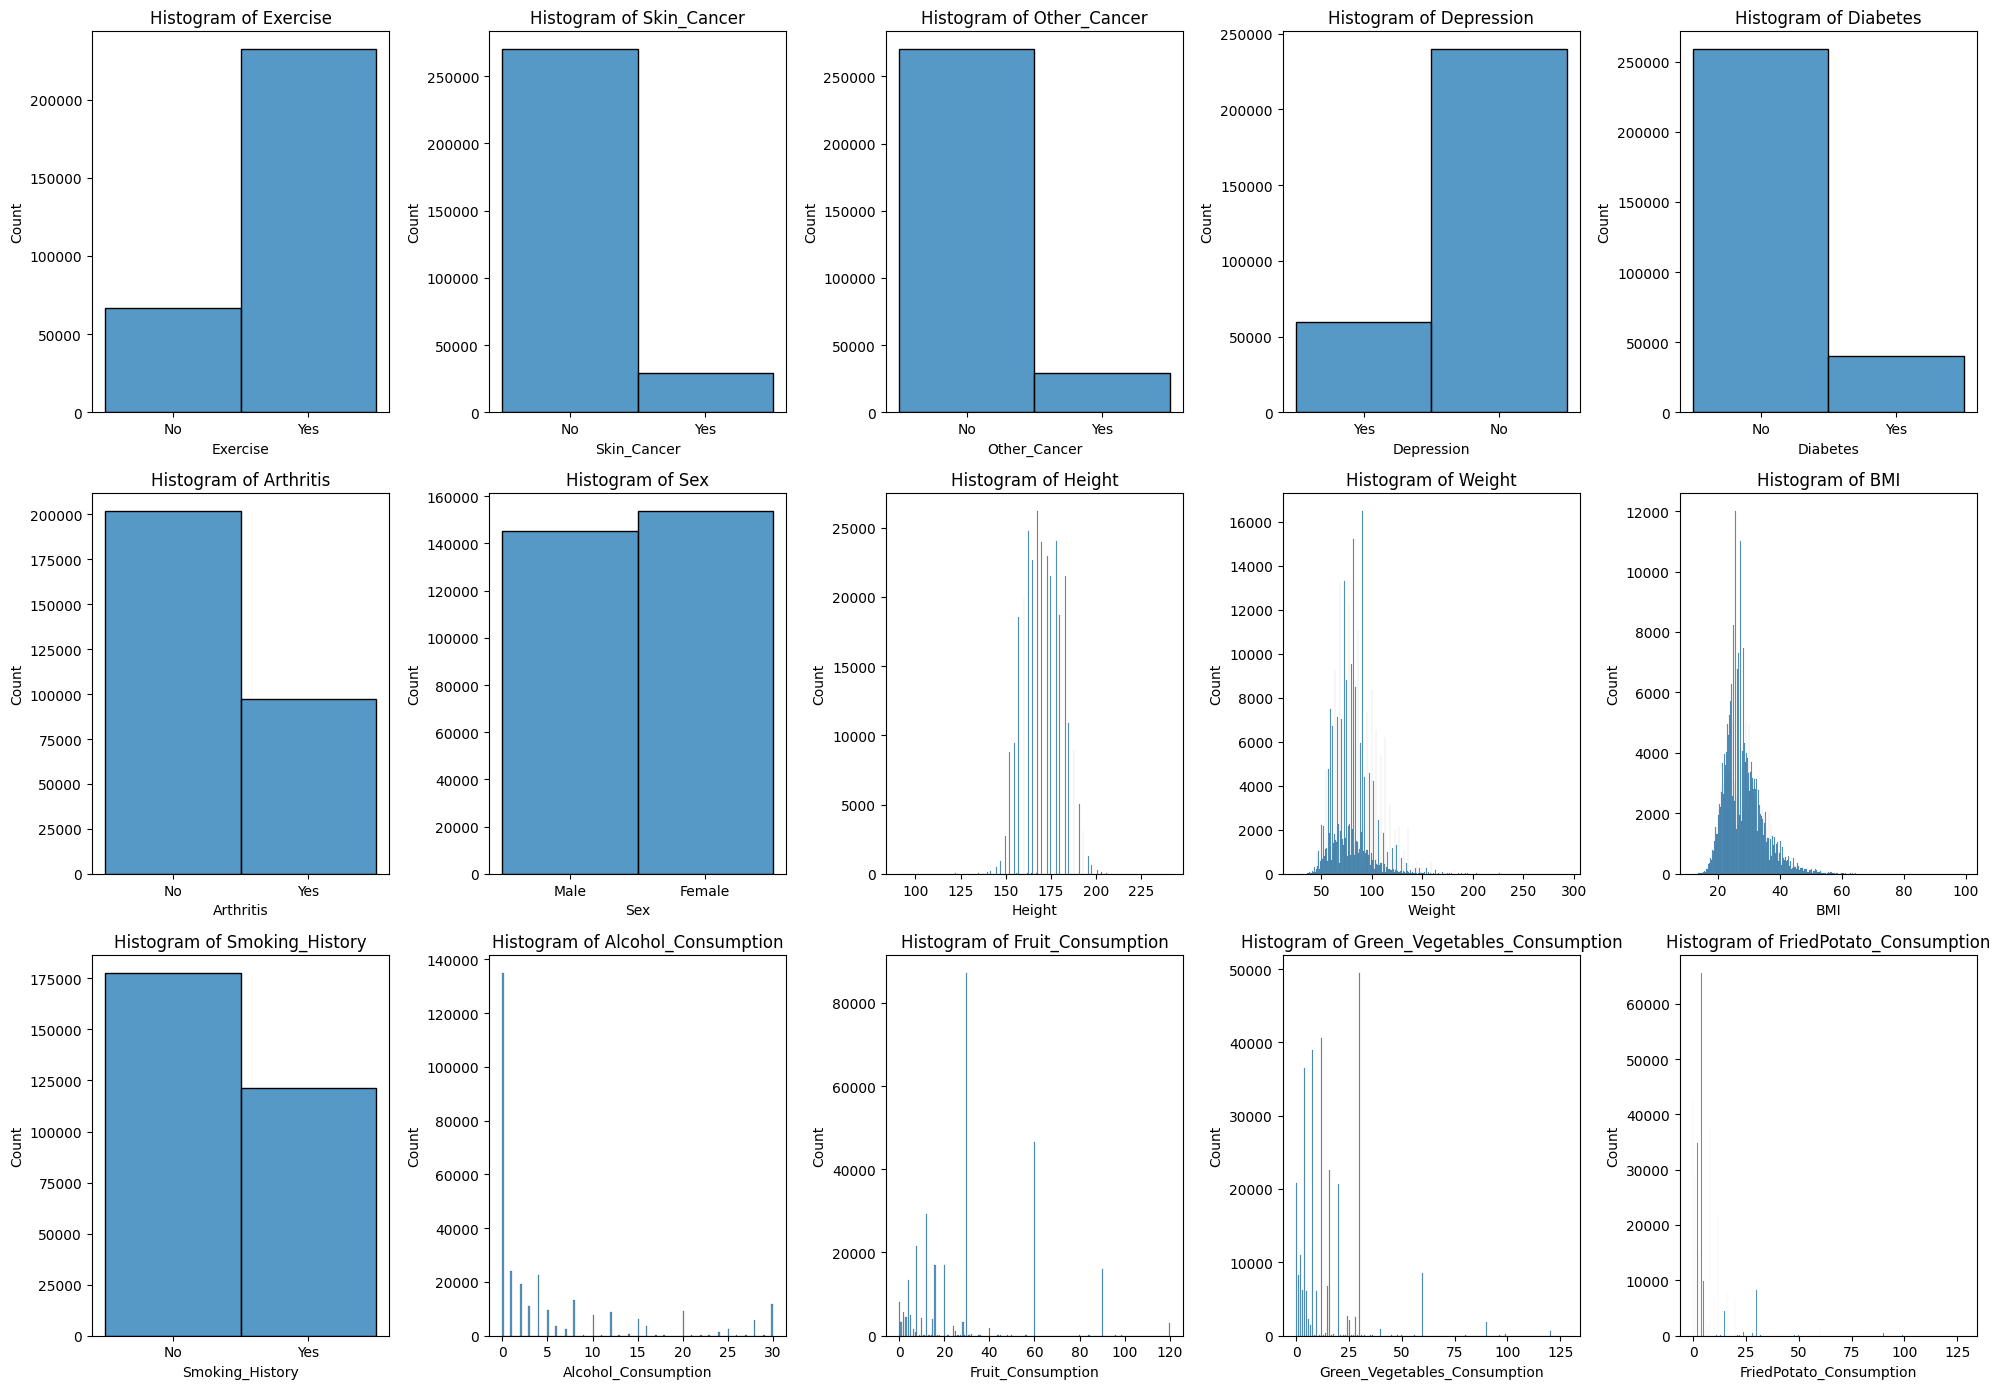

In [18]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))
axes = axes.flatten()
subplot_index = 0
for i in range(len(cvd_df.columns)):
    col = cvd_df.columns[i]
    if col == "Age_Category" or col == "Heart_Disease":
        continue
    sns.histplot(data=cvd_df, ax=axes[subplot_index], x=col)
    axes[subplot_index].set_xlabel(col)
    axes[subplot_index].set_ylabel('Count')
    axes[subplot_index].set_title(f'Histogram of {col}')
    subplot_index += 1
plt.tight_layout()
plt.show()

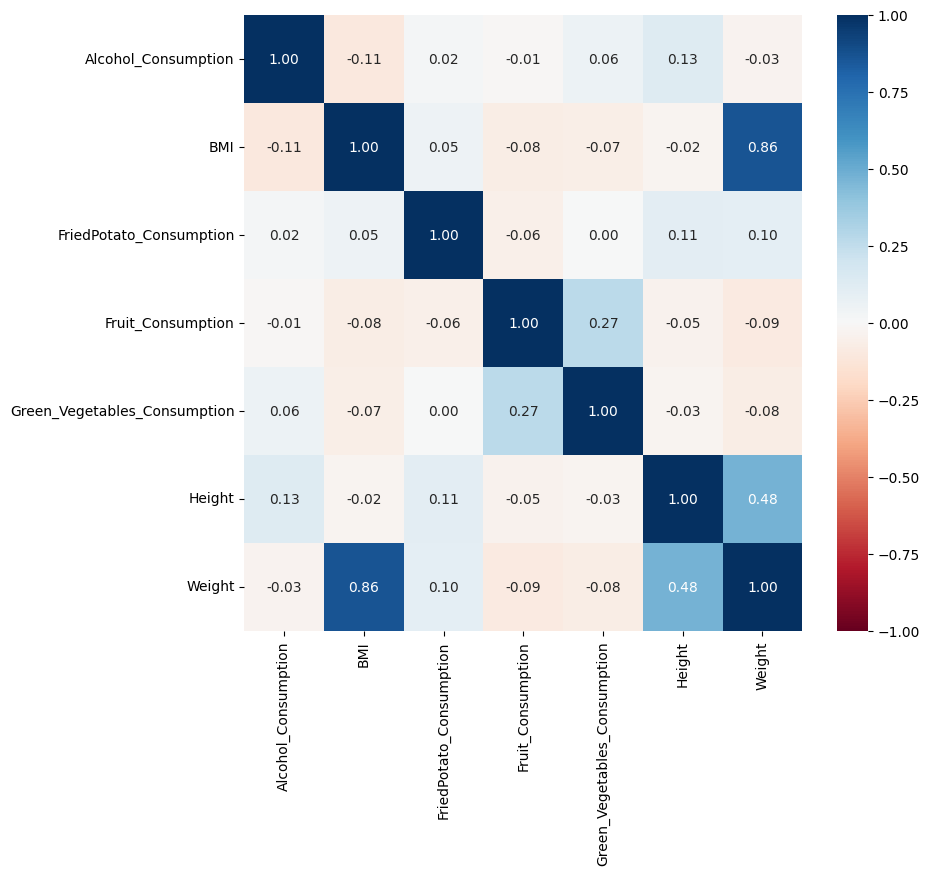

In [19]:
numerical = cvd_df.select_dtypes(include=['float64']).columns.sort_values()
correlation_matrix = cvd_df[numerical].corr()
plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix,
            cmap='RdBu',
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1)
plt.show()

In [20]:
col_remain_categorical = [col for col in cvd_df.columns if (col in categorical) and (col not in ['Sex', 'Age_Category'])]
categorical_counts = cvd_df[col_remain_categorical].apply(lambda col: col.value_counts(normalize=True), axis = 0)
categorical_counts

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Smoking_History
No,0.223728,0.919445,0.902795,0.903334,0.801262,0.865632,0.674823,0.594682
Yes,0.776272,0.080555,0.097205,0.096666,0.198738,0.134368,0.325177,0.405318


Takeaways: Upon reviewing the correlation matrix, a notable high correlation among the 'Height,' 'Weight,' and 'BMI' columns was identified. Given that BMI is derived from both height and weight, a decision was made to mitigate the issue of multicollinearity within the models. Consequently, the choice was made to eliminate the 'Height' and 'Weight' columns, retaining only the 'BMI' column in the dataset. This strategic move aims to alleviate multicollinearity, thereby enhancing the stability and effectiveness of the predictive models by removing redundant information.

#Part 4: Feature Engineering & Preprocessing

##4.1 Data Encoding

From the previous section, we found out that the columns `'Exercise',	'Heart_Disease',	'Skin_Cancer',	'Other_Cancer',	'Depression',	'Diabetes',	'Sex', 'Arthritis', 'Smoking_History'` are categorical. To fit a model on them, these categorical columns must be encoded.

In [21]:
columns_of_interest = ['Exercise',	'Heart_Disease',	'Skin_Cancer',	'Other_Cancer',	'Depression',	'Diabetes',	'Sex', 'Arthritis', 'Smoking_History']
unique_values = cvd_df[columns_of_interest].apply(lambda x: x.unique())
unique_values

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Sex,Arthritis,Smoking_History
0,No,No,No,No,Yes,No,Male,No,No
1,Yes,Yes,Yes,Yes,No,Yes,Female,Yes,Yes


After data cleaning, all the categorical variables have two unique values. Thus, an 0-1 encoding could be applied to these variables.

In [22]:
cvd_df_encoded = cvd_df.copy()
columns_of_interest_except_sex = ['Exercise',	'Heart_Disease',	'Skin_Cancer',	'Other_Cancer',	'Depression',	'Diabetes', 'Arthritis', 'Smoking_History']
for col in columns_of_interest_except_sex:
  cvd_df_encoded[col + '_Encoded'] = cvd_df_encoded[col].apply(lambda x: 1 if x == "Yes" else 0)
cvd_df_encoded['Sex_Encoded'] = cvd_df_encoded['Sex'].apply(lambda x: 1 if x == "Female" else 0)
cvd_df_encoded.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,...,FriedPotato_Consumption,Exercise_Encoded,Heart_Disease_Encoded,Skin_Cancer_Encoded,Other_Cancer_Encoded,Depression_Encoded,Diabetes_Encoded,Arthritis_Encoded,Smoking_History_Encoded,Sex_Encoded
0,No,No,No,No,Yes,No,No,Male,18-24,178.0,...,1.0,0,0,0,0,1,0,0,0,0
1,Yes,No,No,No,Yes,No,Yes,Male,18-24,193.0,...,12.0,1,0,0,0,1,0,1,1,0
2,Yes,No,No,No,No,No,No,Female,18-24,160.0,...,0.0,1,0,0,0,0,0,0,0,1
3,Yes,No,No,No,Yes,No,No,Female,18-24,168.0,...,1.0,1,0,0,0,1,0,0,0,1
4,No,No,No,No,No,No,No,Male,18-24,173.0,...,16.0,0,0,0,0,0,0,0,0,0


For the `Age_Category` columns, we decide to use the mean value in each category to represent the categories. The 5-year categories are considered narrow enough for a uniform distribution assumption and assume median value is equal to the mean value.

In [23]:
cvd_df_encoded['Age_Category'].unique()

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], dtype=object)

For the category `80+`, we found census data from the Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States: April 1, 2020 to July 1, 2022 by U.S. Census Bureau. We use the latest (2022) estimate to find out the mean age of U.S. population over 80 years old.

In [24]:
census_df = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/national/asrh/nc-est2022-agesex-res.csv')
census_df_relevant = census_df.query('SEX == 0 and AGE >= 80 and AGE < 999')[['AGE', 'POPESTIMATE2022']]
census_df_relevant['frequency'] = census_df_relevant['POPESTIMATE2022'] / census_df_relevant['POPESTIMATE2022'].sum()
mean_age_80plus = census_df_relevant['AGE'] * census_df_relevant['frequency']
mean_age_80plus = mean_age_80plus.sum()
mean_age_80plus

85.47505764938691

Therefore, we decide to encode age as follows:

In [25]:
age_encode_dict = {'18-24': 21.5, '25-29': 27.5, '30-34': 32.5, '35-39': 37.5, '40-44': 42.5, '45-49': 47.5, '50-54': 52.5, '55-59': 57.5, '60-64': 62.5, '65-69': 67.5, '70-74': 72.5, '75-79': 77.5, '80+': 85.5}
cvd_df_encoded['Age_Category_Encoded'] = cvd_df_encoded['Age_Category'].apply(lambda x: age_encode_dict[x])
cvd_df_encoded.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,...,Exercise_Encoded,Heart_Disease_Encoded,Skin_Cancer_Encoded,Other_Cancer_Encoded,Depression_Encoded,Diabetes_Encoded,Arthritis_Encoded,Smoking_History_Encoded,Sex_Encoded,Age_Category_Encoded
0,No,No,No,No,Yes,No,No,Male,18-24,178.0,...,0,0,0,0,1,0,0,0,0,21.5
1,Yes,No,No,No,Yes,No,Yes,Male,18-24,193.0,...,1,0,0,0,1,0,1,1,0,21.5
2,Yes,No,No,No,No,No,No,Female,18-24,160.0,...,1,0,0,0,0,0,0,0,1,21.5
3,Yes,No,No,No,Yes,No,No,Female,18-24,168.0,...,1,0,0,0,1,0,0,0,1,21.5
4,No,No,No,No,No,No,No,Male,18-24,173.0,...,0,0,0,0,0,0,0,0,0,21.5


In [26]:
cvd_df_encoded = cvd_df_encoded.drop(columns=columns_of_interest + ['Age_Category'])
cvd_df_encoded.head()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Encoded,Heart_Disease_Encoded,Skin_Cancer_Encoded,Other_Cancer_Encoded,Depression_Encoded,Diabetes_Encoded,Arthritis_Encoded,Smoking_History_Encoded,Sex_Encoded,Age_Category_Encoded
0,178.0,68.04,21.52,25.0,4.0,0.0,1.0,0,0,0,0,1,0,0,0,0,21.5
1,193.0,120.20,32.26,1.0,60.0,4.0,12.0,1,0,0,0,1,0,1,1,0,21.5
2,160.0,49.90,19.49,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,1,21.5
3,168.0,68.04,24.21,0.0,60.0,7.0,1.0,1,0,0,0,1,0,0,0,1,21.5
4,173.0,72.57,24.33,1.0,90.0,4.0,16.0,0,0,0,0,0,0,0,0,0,21.5


Here we also include the categorical data to take a full look of the inter-correlation

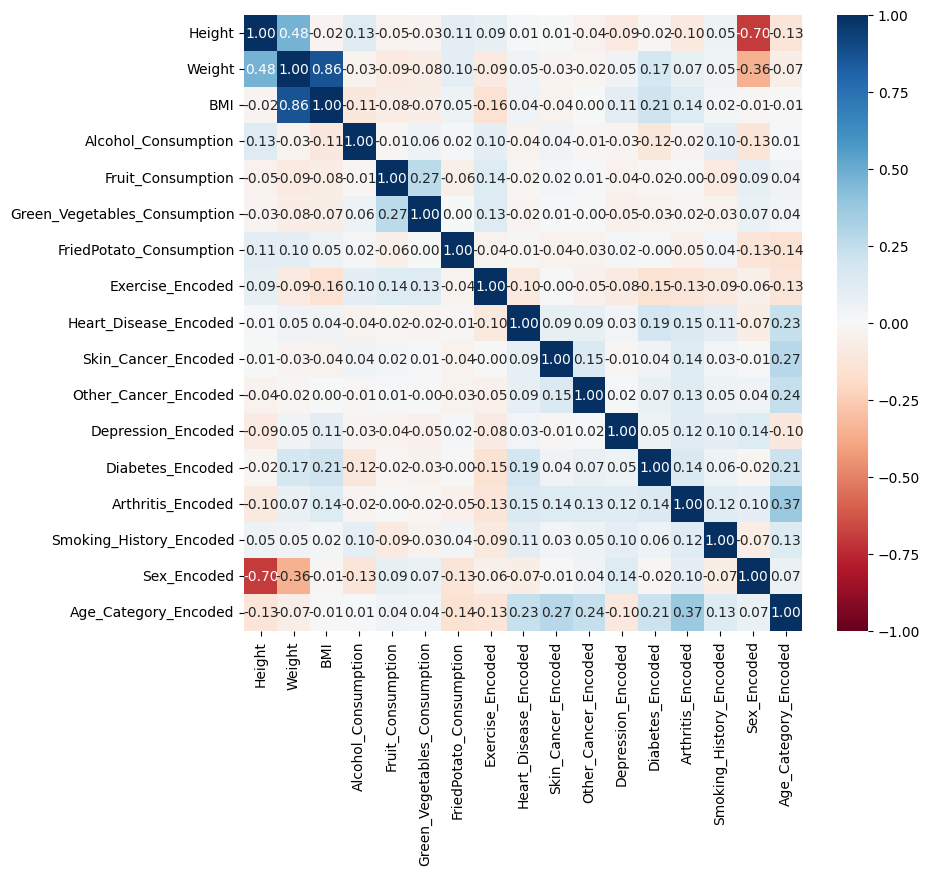

In [27]:
correlation_matrix_full = cvd_df_encoded.corr()
plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix_full,
            cmap='RdBu',
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1)
plt.show()

We drop **`Height`** and **`Weight`** due to the inter-correlation with **`BMI`** and **`sex`**.

In [28]:
cvd_df_encoded = cvd_df_encoded.drop(["Height","Weight"], axis = 1)

Now, we have converted all the categorical columns to numerical columns and solved the problem of multi-colinearity, which prepares us for dimensionality reduction and modeling!

In [29]:
cvd_df_encoded.head()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Encoded,Heart_Disease_Encoded,Skin_Cancer_Encoded,Other_Cancer_Encoded,Depression_Encoded,Diabetes_Encoded,Arthritis_Encoded,Smoking_History_Encoded,Sex_Encoded,Age_Category_Encoded
0,21.52,25.0,4.0,0.0,1.0,0,0,0,0,1,0,0,0,0,21.5
1,32.26,1.0,60.0,4.0,12.0,1,0,0,0,1,0,1,1,0,21.5
2,19.49,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,1,21.5
3,24.21,0.0,60.0,7.0,1.0,1,0,0,0,1,0,0,0,1,21.5
4,24.33,1.0,90.0,4.0,16.0,0,0,0,0,0,0,0,0,0,21.5


## 4.2 Split Data to Train and Test

To model our data and evaluate our modeling, we need to first split our dataset to a training dataset and a testing dataset, where we use the training dataset to fit the model, and the testing dataset to evaluate how good our model fits the data.

In [30]:
features = cvd_df_encoded.drop(columns=['Heart_Disease_Encoded'])
target = cvd_df_encoded['Heart_Disease_Encoded']
seed = 42 # Set seed for reproducibility
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)
(X_train_unscaled.shape, X_test_unscaled.shape, y_train.shape, y_test.shape, Counter(y_test))

((239140, 14), (59786, 14), (239140,), (59786,), Counter({0: 55021, 1: 4765}))

##4.3 PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that could decrease the dimension of our dataset, while keeping most of its variance.

In [31]:

# Intermediate step to address scale-invariance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

# Instantiate and Fit PCA
pca = PCA().fit(X_train)

# Explained variance ratio
explained_variance_ratios = pca.explained_variance_ratio_

cum_evr = [sum(explained_variance_ratios[:i+1]) for i in range(len(explained_variance_ratios))]

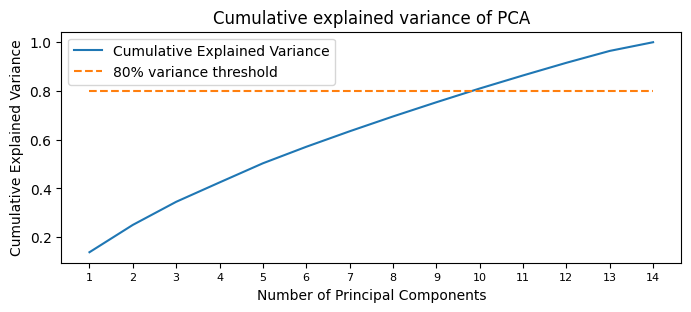

In [32]:
fig = plt.figure(figsize=(8,3))
cum_evr_x = [i+1 for i in range(len(cum_evr))]
plt.plot(cum_evr_x, cum_evr)
plt.plot(cum_evr_x, [0.8 for i in range(1, len(cum_evr)+1)],'--')
plt.xticks(cum_evr_x,fontsize=8)
plt.title("Cumulative explained variance of PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend(["Cumulative Explained Variance", "80% variance threshold"], loc ="upper left")
plt.show()

We found out that 10 principal components are enough to explain 80% of the variance. Now, we use 10 principal components to refit the PCA.

In [33]:
n=10
pca = PCA(n_components=n).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Part 5: Modeling

##5.1 Baseline Model: Logistic Regression

We decide to use Logistic Regression on our cleaned dataset before PCA for baseline model.

In [34]:
sum(y_test[y_test == 1]) / len(y_test) # proportion of label 1 (has cardiovascular disease) in whole dataset

0.07970093332887299

The proportion of samples that has cardiovascular disease only makes up 7.97% of the complete dataset. Therefore, we decide to use AUROC (Area Under the Receiver Operating Characteristic (ROC) curve) instead of accuracy to evaluate how good the model fits the data, due to the imbalance in the dataset.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

param_grid = {"C": [0.01, 1.0, 100], "penalty": ["l1", "l2", "elasticnet"]}
pgrid = ParameterGrid(param_grid)

best_params = None
best_auc = 0

for params in pgrid:
  l1_ratio = 0.5 if params["penalty"] == "elasticnet" else None
  log_reg = LogisticRegression(solver='saga', l1_ratio = l1_ratio, **params).fit(X_train, y_train)

  y_train_proba = log_reg.predict_proba(X_train)[:, 1]
  y_test_proba = log_reg.predict_proba(X_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_proba)
  auc_test = roc_auc_score(y_test, y_test_proba)
  print(f"Hyperparameter: {params}, Train AUROC: {auc_train}, Test AUROC: {auc_test}")
  if auc_test > best_auc:
    best_auc = auc_test
    best_params = params

print(f"Best Hyperparameter: {best_params}, Best Test AUROC: {best_auc}")
l1_ratio = 0.5 if best_params["penalty"] == "elasticnet" else None
log_reg = LogisticRegression(solver='saga', l1_ratio = l1_ratio, **best_params).fit(X_train, y_train)

Hyperparameter: {'C': 0.01, 'penalty': 'l1'}, Train AUROC: 0.8127420786526264, Test AUROC: 0.8116250128516226
Hyperparameter: {'C': 0.01, 'penalty': 'l2'}, Train AUROC: 0.8127919316894788, Test AUROC: 0.8115989462994888
Hyperparameter: {'C': 0.01, 'penalty': 'elasticnet'}, Train AUROC: 0.8127713387431741, Test AUROC: 0.8116166405832682
Hyperparameter: {'C': 1.0, 'penalty': 'l1'}, Train AUROC: 0.8127597570361593, Test AUROC: 0.8115509020661443
Hyperparameter: {'C': 1.0, 'penalty': 'l2'}, Train AUROC: 0.8127604454617742, Test AUROC: 0.8115508486667107
Hyperparameter: {'C': 1.0, 'penalty': 'elasticnet'}, Train AUROC: 0.8127603938828452, Test AUROC: 0.8115519242838749
Hyperparameter: {'C': 100, 'penalty': 'l1'}, Train AUROC: 0.8127600467260347, Test AUROC: 0.8115509478370873
Hyperparameter: {'C': 100, 'penalty': 'l2'}, Train AUROC: 0.8127592473703946, Test AUROC: 0.811549975204545
Hyperparameter: {'C': 100, 'penalty': 'elasticnet'}, Train AUROC: 0.8127600033903137, Test AUROC: 0.8115508639

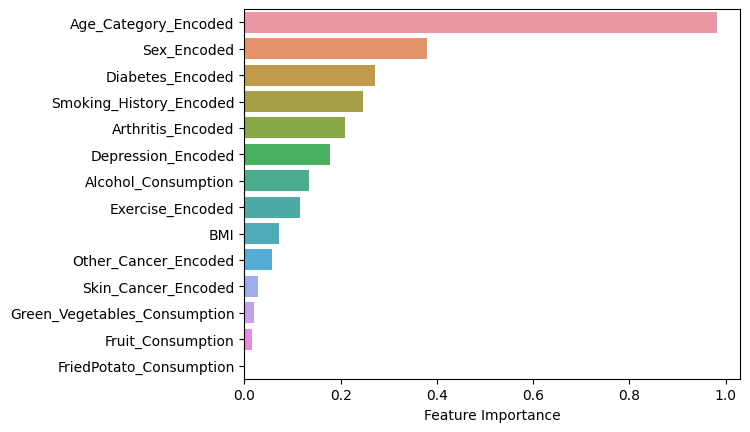

In [36]:
features = X_train_unscaled.columns
importances = np.abs(log_reg.coef_[0])

idxs = np.argsort(-1 * importances) # -1 * makes the sort descending
sns.barplot(y=features[idxs], x=importances[idxs], orient='h')
plt.xlabel("Feature Importance");

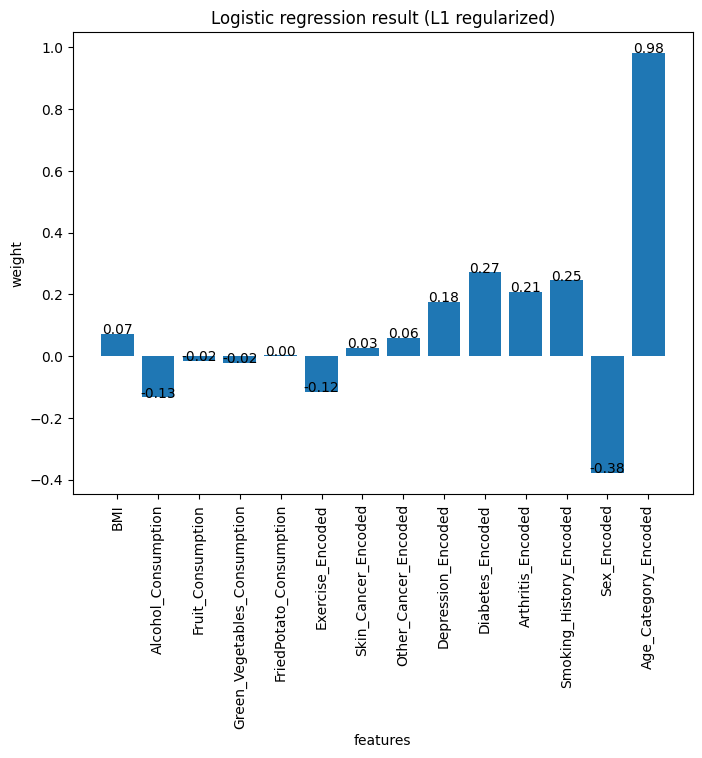

In [37]:
weight_log_reg = log_reg.coef_
plt.figure(figsize=(8, 6))
plt.bar(X_train_unscaled.columns, weight_log_reg[0])
for key, value in enumerate(weight_log_reg[0]):
    plt.text(key, value, f'{value:.2f}', ha='center')
plt.xlabel('features')
plt.ylabel('weight')
plt.xticks(rotation='vertical')
plt.title('Logistic regression result (L1 regularized)')
plt.show()

The simple Logistic Regression model achieves around <b>81%</b> AUROC both on the training dataset and on the testing dataset.

## 5.2 Logistic Regression with PCA

 Principal Components Analysis (PCA) could help us to select the most informative features for the model. Now, we apply the same Logistic Regression model on a PCA-transformed dataset to see if there is an improvement.

In [38]:
param_grid = {"C": [0.01, 1.0, 100], "penalty": ["l1", "l2", "elasticnet"]}
pgrid = ParameterGrid(param_grid)

best_params = None
best_auc = 0

for params in pgrid:
  l1_ratio = 0.5 if params["penalty"] == "elasticnet" else None
  log_reg_pca = LogisticRegression(solver='saga', l1_ratio = l1_ratio, **params).fit(X_train_pca, y_train)

  y_train_proba = log_reg_pca.predict_proba(X_train_pca)[:, 1]
  y_test_proba = log_reg_pca.predict_proba(X_test_pca)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_proba)
  auc_test = roc_auc_score(y_test, y_test_proba)
  print(f"Hyperparameter: {params}, Train AUROC: {auc_train}, Test AUROC: {auc_test}")
  if auc_test > best_auc:
    best_auc = auc_test
    best_params = params

print(f"Best Hyperparameter: {best_params}, Best Test AUROC: {best_auc}")
l1_ratio = 0.5 if best_params["penalty"] == "elasticnet" else None
log_reg_pca = LogisticRegression(solver='saga', l1_ratio = l1_ratio, **best_params).fit(X_train_pca, y_train)

Hyperparameter: {'C': 0.01, 'penalty': 'l1'}, Train AUROC: 0.7924107432667933, Test AUROC: 0.7918125451785432
Hyperparameter: {'C': 0.01, 'penalty': 'l2'}, Train AUROC: 0.7923381547561587, Test AUROC: 0.7917854030092449
Hyperparameter: {'C': 0.01, 'penalty': 'elasticnet'}, Train AUROC: 0.7923797721218185, Test AUROC: 0.7918019492052
Hyperparameter: {'C': 1.0, 'penalty': 'l1'}, Train AUROC: 0.7923193807325438, Test AUROC: 0.791762986689829
Hyperparameter: {'C': 1.0, 'penalty': 'l2'}, Train AUROC: 0.7923189758732788, Test AUROC: 0.791763379557091
Hyperparameter: {'C': 1.0, 'penalty': 'elasticnet'}, Train AUROC: 0.7923193581226023, Test AUROC: 0.7917635473838827
Hyperparameter: {'C': 100, 'penalty': 'l1'}, Train AUROC: 0.7923183402041942, Test AUROC: 0.7917626014510573
Hyperparameter: {'C': 100, 'penalty': 'l2'}, Train AUROC: 0.7923185736047363, Test AUROC: 0.7917627235069056
Hyperparameter: {'C': 100, 'penalty': 'elasticnet'}, Train AUROC: 0.7923186021026833, Test AUROC: 0.79176273876388

After applying PCA, the models's result is <b>79%</b>. There is a slight decrase in both train and test AUROC. Since the number of selected principal components is 10 out of 14 total features, it is within expectation that applying PCA would not have much effect on the classifying performance. This suggests that we should move to models of higher complexity.

## 5.3 Decision Tree

We decided to use decision tree as our next step to predict out target feature: Heart_Disease. We chose decision tree because it is advantageous for binary classification tasks (yes or no predictions); decision trees provide interpretable and easy-to-follow decision paths. They excel in handling complex decision boundaries, requiring minimal assumptions about data distribution and offering insights into feature importance.

In [39]:
def build_decision_tree(**kwargs):
  dt = DecisionTreeClassifier(random_state = 0, **kwargs)
  dt = dt.fit(X_train, y_train)
  train_pred_dt = dt.predict(X_train)
  test_pred_dt = dt.predict(X_test)

  train_proba_dt = dt.predict_proba(X_train)[:, 1]
  test_proba_dt = dt.predict_proba(X_test)[:, 1]

  print(f"Hyperparameters: {kwargs} " + "Training AUC : %.4f, Testing AUC: %.4f"%(
    roc_auc_score(y_train, train_proba_dt), roc_auc_score(y_test, test_proba_dt)))
  return dt
dt = build_decision_tree()

Hyperparameters: {} Training AUC : 1.0000, Testing AUC: 0.5624


We get a result of <b>100.00%</b> training AUROC (area under the receiver operating characteristic (ROC) curve) and <b>56.24%</b> testing AUROC. Our model performs well on familiar data (training) but not as well on unfamiliar/unseen data (testing). This phenomenon might be due to overfitting, since the training AUC is abnormally high. Thus, it is natural to try to impose regularizations on the model.  <!-- This suggests that our model became too acclimated to what it was trained with and cannot generalize well. The phenomenon may due to the parameter max_depth being set to None, which could lead to overly expanded nodes. Thus, we can adjust the parameter max_depth to improve the generalizing ability of our model. Our new decision tree has a slight higher accuracy: **92.03%**, compare to the previous logistic regression model with PCA. Also, with the adjusted model, we can pinpoint the most important feature contributing to have the heart disease: <b>Age_Category_Encoded</b>. -->

In [40]:
for d in [1, 3, 5, 10, 15, 20]:

  dt = build_decision_tree(max_depth = d)

Hyperparameters: {'max_depth': 1} Training AUC : 0.6911, Testing AUC: 0.6895
Hyperparameters: {'max_depth': 3} Training AUC : 0.7663, Testing AUC: 0.7654
Hyperparameters: {'max_depth': 5} Training AUC : 0.7969, Testing AUC: 0.7948
Hyperparameters: {'max_depth': 10} Training AUC : 0.8301, Testing AUC: 0.7916
Hyperparameters: {'max_depth': 15} Training AUC : 0.9117, Testing AUC: 0.6852
Hyperparameters: {'max_depth': 20} Training AUC : 0.9843, Testing AUC: 0.5909


Max-depth is the maximum allowed depth of the decision tree. By fitting decision tree from max depth 1 to 20, we see that while the training accuracy goes up, the testing accuracy goes up to at most <b>79.48%</b> and then goes down due to overfitting. We select the best-performing max-depth = 10 as our final hyperparameter for feature interpretation.

In [41]:
dt = build_decision_tree(max_depth = 10)

Hyperparameters: {'max_depth': 10} Training AUC : 0.8301, Testing AUC: 0.7916


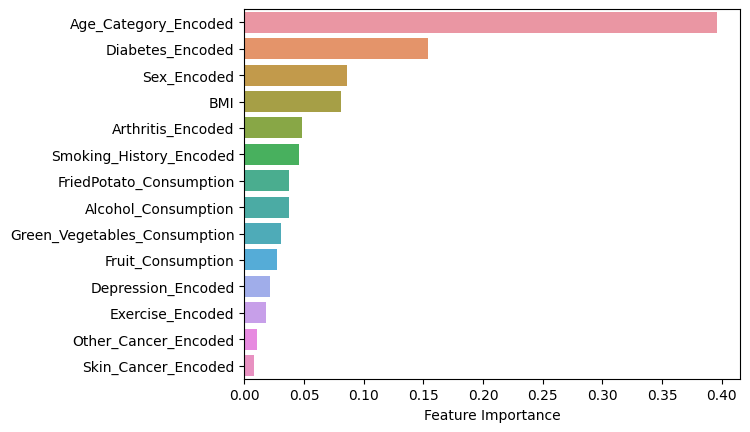

In [42]:
idxs = np.argsort(-1 * dt.feature_importances_) # -1 * makes the sort descending
sns.barplot(y=X_train_unscaled.columns[idxs], x=dt.feature_importances_[idxs], orient='h')
plt.xlabel("Feature Importance");

We found that age is the most decisive feature, which is relatively unsurprising. However, we found that, diabetes, sex, smoking history, BMI and arthritis are also correlated to risk of cardiovascular disease. The correlations between BMI, diabetes and cardiovascular disease are especially interesting, due to their low correlation with age.

## 5.4 Random Forest

A natural step after decision tree is the random forest, which are Ensembles of decision trees. It pertains the advantage of decision trees while address the issue of overfitting. By aggregating the predictions of multiple trees through randomization and ensemble techniques, Random Forest offers enhanced predictive performance, generalization, and stability,

In [43]:
# clf = RandomForestClassifier(n_estimators=120,max_depth=30,random_state=42,class_weight='balanced')
param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15], "min_samples_split": [2,3,5]}
pgrid = ParameterGrid(param_grid)

for params in pgrid:
  clf = RandomForestClassifier(**params)
  clf.fit(X_train,y_train)

  y_proba_train = clf.predict_proba(X_train)
  y_proba_test = clf.predict_proba(X_test)

  rf_train_auc = roc_auc_score(y_train, y_proba_train[:,1])
  rf_test_auc = roc_auc_score(y_test, y_proba_test[:,1])
  print(f"hyperparameters: {params}, Train AUROC: {rf_train_auc}, Test AUROC: {rf_test_auc}")


hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}, Train AUROC: 0.8090519520225284, Test AUROC: 0.8069293241140227
hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}, Train AUROC: 0.8096990416004965, Test AUROC: 0.8077231829808071
hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}, Train AUROC: 0.8098110776289673, Test AUROC: 0.8076716658771497
hyperparameters: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 50}, Train AUROC: 0.8080516607723316, Test AUROC: 0.8065452219874533
hyperparameters: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}, Train AUROC: 0.809256798799106, Test AUROC: 0.8071007134107128
hyperparameters: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200}, Train AUROC: 0.8098115360690832, Test AUROC: 0.807259664453597
hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}, Train AUROC: 0.8100757179267308, Test AUROC: 0.80699862704334

The parameter mainly influencing train and test AUROC is max_depth, with other two regularizing parameters has little influence on the AUROC value. we found that max_depth=10, min_samples_split=3 and n_estimators=200 is the best, which has a AUROC of **81.30%**.

##5.5 XGBoost

In [44]:
param_grid = {"eta": [0.2, 0.3, 0.4], "max_depth": [4, 6, 8], "gamma": [0,1,5]}
pgrid = ParameterGrid(param_grid)

for params in pgrid:
  clf = xgb.XGBClassifier(**params)
  clf.fit(X_train, y_train)

  y_train_proba = clf.predict_proba(X_train)[:, 1]
  y_test_proba = clf.predict_proba(X_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_proba)
  auc_test = roc_auc_score(y_test, y_test_proba)
  print(f"Hyperparameters: {params}, Train AUROC: {auc_train}, Test AUROC: {auc_test}")

Hyperparameters: {'eta': 0.2, 'gamma': 0, 'max_depth': 4}, Train AUROC: 0.8260257627918615, Test AUROC: 0.8147197446103426
Hyperparameters: {'eta': 0.2, 'gamma': 0, 'max_depth': 6}, Train AUROC: 0.8466258558400139, Test AUROC: 0.8103140453116698
Hyperparameters: {'eta': 0.2, 'gamma': 0, 'max_depth': 8}, Train AUROC: 0.8881799539375435, Test AUROC: 0.8039603766284945
Hyperparameters: {'eta': 0.2, 'gamma': 1, 'max_depth': 4}, Train AUROC: 0.821644509130074, Test AUROC: 0.8153874091725695
Hyperparameters: {'eta': 0.2, 'gamma': 1, 'max_depth': 6}, Train AUROC: 0.8315713600224263, Test AUROC: 0.8136862862988133
Hyperparameters: {'eta': 0.2, 'gamma': 1, 'max_depth': 8}, Train AUROC: 0.8519860351815989, Test AUROC: 0.8110044008189718
Hyperparameters: {'eta': 0.2, 'gamma': 5, 'max_depth': 4}, Train AUROC: 0.8195722411035843, Test AUROC: 0.8150670964837939
Hyperparameters: {'eta': 0.2, 'gamma': 5, 'max_depth': 6}, Train AUROC: 0.8242616484843581, Test AUROC: 0.8141231508801191
Hyperparameters: 

The XGBoost model has the highest AUROC of **81.54%** when setting eta = 0.2, gamma = 1 and max_depth = 4. We select our best model and perform a confusion matrix to further analyze the model.

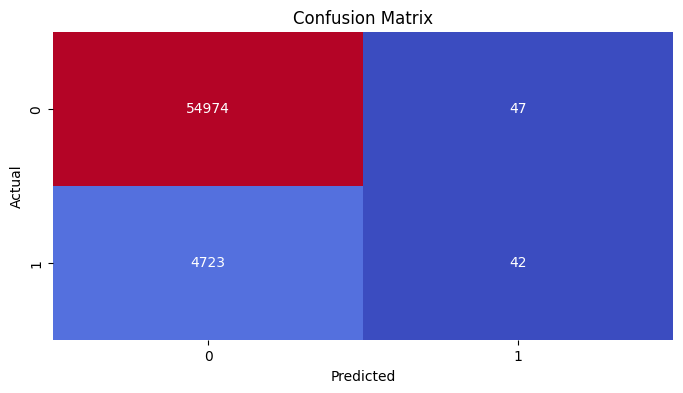


Accuracy: 0.9202154350516843
Precision: 0.47191011235955055
Recall: 0.00881427072402938
F1 Score: 0.017305315203955497


In [45]:
clf = xgb.XGBClassifier(eta=0.2, gamma = 1, max_depth = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Our best XGBoost model demonstrated a high accuracy at 92%. Despite this, there are 4,723 instances where the model incorrectly predicted a negative outcome when the actual value is positive. In the context of detecting heart diseases, it is generally preferable to have false positives (informing an individual they might have the condition when they do not) rather than false negatives. This is because false negatives could potentially delay necessary medical attention; whereas false positives can be addressed by seeing the doctors.

The observed imbalance in precision and accuracy suggests that the model is affected by the imbalanced distribution of the target feature. To address this, a potential future improvements involves resampling the dataset. Techniques like undersampling or oversampling can be employed to balance the representation of classes in the training data, potentially enhancing the precision and overall performance of the model.

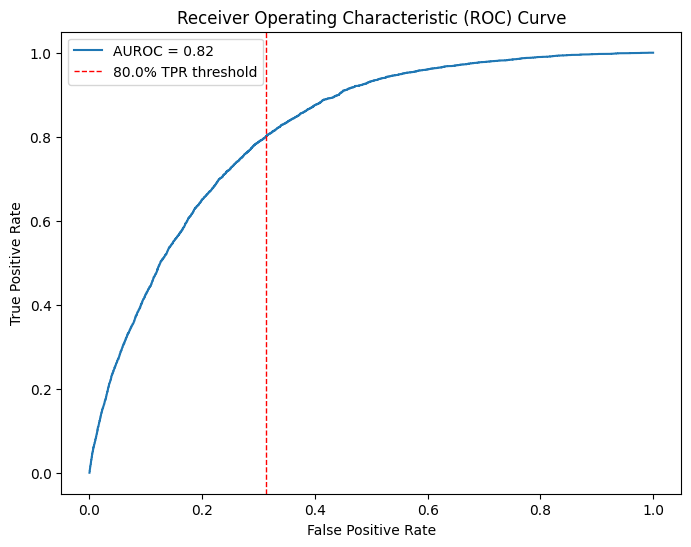

In [46]:
from sklearn.metrics import roc_curve

y_train_proba = clf.predict_proba(X_train)[:, 1]
y_test_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUROC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

ratio = 0.8
idx = (tpr >= ratio).nonzero()[0][0]
plt.axvline(fpr[idx], color='red', linestyle='--', lw=1, label=f'{ratio * 100}% TPR threshold')

plt.legend()
plt.show()

While dealing with disease prediction, it is most important that an actual positive patient will be tested positive. This is where True Positive Rate
(TPR) comes in. TPR is defined as $TPR = \frac{TP}{TP+FN}$, which is the ratio of positive patient that tested positive. Our model could correctly detect positive patients with around 30% false positive rate, which is rather strong performance in a dataset where patients only make up less than 8% of the total population.

# Part 6: Reflection and Conclusion

## 6.1 Findings

Now that we have tried several different models - **logistic regression(including OLS, Lasso and Ridge), decision tree, random forest, XGBoost** - on the data, and done hyperparameter tuning in each of their sections, let's take a look at how they have performed, and what they tell us.

Overall, the various models after hyperparameter tuning perform a similar Testing AUROC around 80%. **XGBoost performed the best with a Testing AUROC of 81.54% (at 80% TPR threshold) and a test accuracy of 92%**.


One downside of XGBoost, however, is that it is hard to show an intuitive, easily interpretable conclusion to the general population. Therefore, we also turn to the logistic regression model for better explanability.

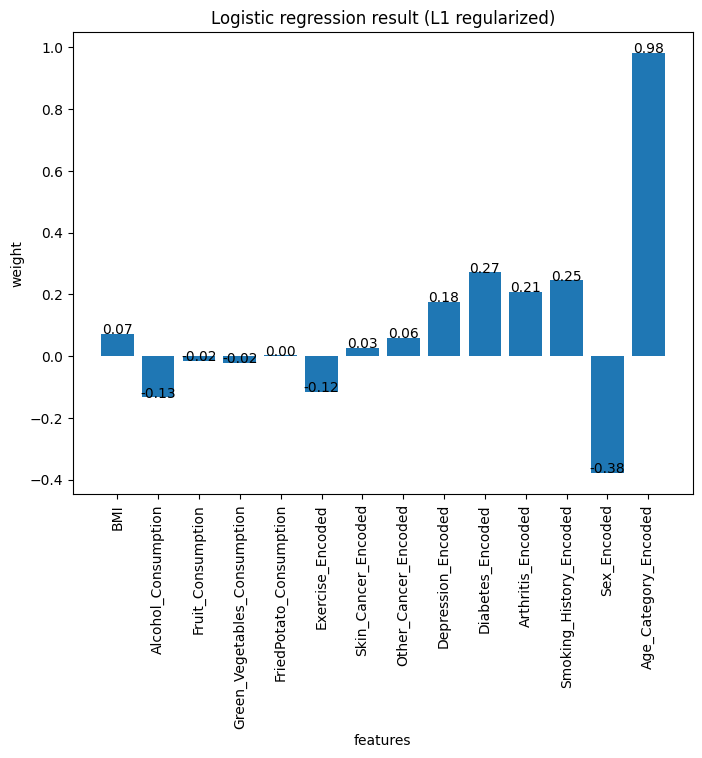

In [47]:
weight_log_reg = log_reg.coef_
plt.figure(figsize=(8, 6))
plt.bar(X_train_unscaled.columns, weight_log_reg[0])
for key, value in enumerate(weight_log_reg[0]):
    plt.text(key, value, f'{value:.2f}', ha='center')
plt.xlabel('features')
plt.ylabel('weight')
plt.xticks(rotation='vertical')
plt.title('Logistic regression result (L1 regularized)')
plt.show()

As a general summary, we categorized the related factors into three categories: **demographic, lifestyle, and other medical conditions**.


*   **Demographic**:
  *    **`Age`** is by far the most significant factor
  *    **`Sex`** is also quite significant, being the second. Males are more likely to be impacted by heart diseases.
  *    **`BMI`** show some level of significance
*   **Lifestyle**:
  *    **`Smoking_History`** shows positive correlation; Exercise shows negative correlation
  *    Diatary habits (**`Green_Vegetable_Consumption`**, **`Fruit_Consumption`**, **`Fried_Potato_Consumption`**) seem very marginal
  *    **`Alcohol_Consumption`** shows a negative correlation quite significantly *(this is quite surprising for us)*
*   **Other medical conditions**:
  *    All medical conditions listed in the dataset shows some level of positive correlation with heart diseases.
  *    **`Diabetes`**, **`Arthritis`** and **`Depression`** shows more significance. Only marginal for cancers.



## 6.2 Possible explanations on several interesting findings
While some of the above results are aligned with our common sense about general health (e.g. age, smoking, exercise), we find some quite interesting (e.g. other medical conditions, alcohol).

We would first like to emphasize that what the logistic regression model shows is the correlation in the data, and it does not imply underlying causation. Therefore we cannot make conclusions such as "drink more will help prevent heart disease".

**Other medical conditions**

One possible reason about this is that the elderly are more likely to get impacted by various medical conditions, so it could be a translation of age. **`Diabetes`** and **`Arthritis`** both show a significant correlation with **`Age`**.

However, we also found that **`Depression`** is NOT possitively correlated with **`Age`**.

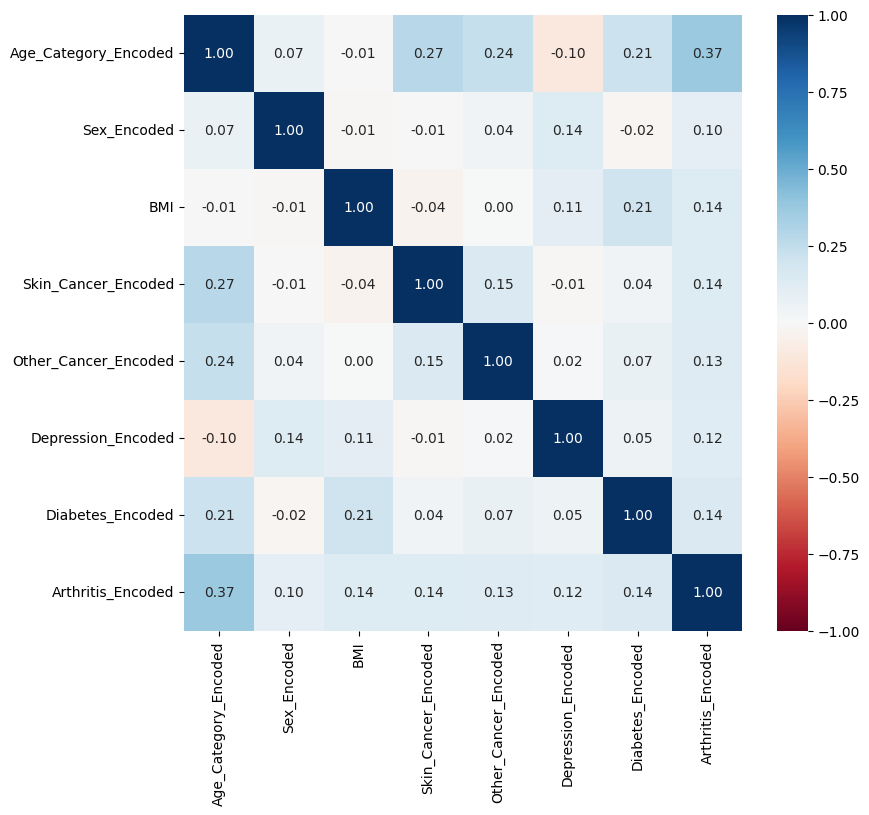

In [48]:
columns_to_keep = ['Age_Category_Encoded', 'Sex_Encoded', 'BMI',
       'Skin_Cancer_Encoded',
       'Other_Cancer_Encoded', 'Depression_Encoded', 'Diabetes_Encoded',
       'Arthritis_Encoded']
correlation_disease_matrix = cvd_df_encoded[columns_to_keep].corr()
plt.figure(figsize=(9,8))
sns.heatmap(correlation_disease_matrix,
            cmap='RdBu',
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1)
plt.show()

**Alcohol consumption**

We initially suspected if there were outliers in the Alcohol_Consumption attribute that distorted the model, and took a look at the distribution of this attribute.

We found that there are some data points to the high end, but not significant outliers.

Thus we do not have a possible theory on this negative correlation between alcohol consumption and heart disease, and believe it can be an interesting topic for further study.

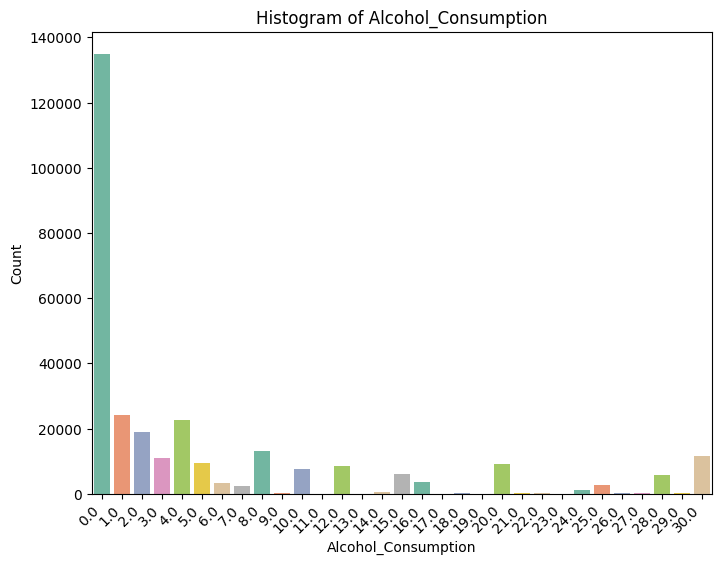

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Alcohol_Consumption', data=cvd_df, palette='Set2')
plt.title('Histogram of Alcohol_Consumption')
plt.xlabel('Alcohol_Consumption')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##6.3 Limitations and reflections

We would like to point out several limitations in our work and the data set used.

**1.   Data granularity:**
  
  Certain attributes in the data set have limited granularity. For example, the **`Smoking`** attribute is a 0-or-1 variable, rather than a quantitative one such as "years of being a smoker".

**2.   Data authenticity / objectiveness:**

  The data set is based on survey, so purely self-reported. People may be subjective or circumspect with their response.

**3.   Data imbalance:**

  As mentioned in the EDA section, the data set has a strong imbalance in the target attribute. This potentially causes the model to be more inclined to predict "No" than "Yes".

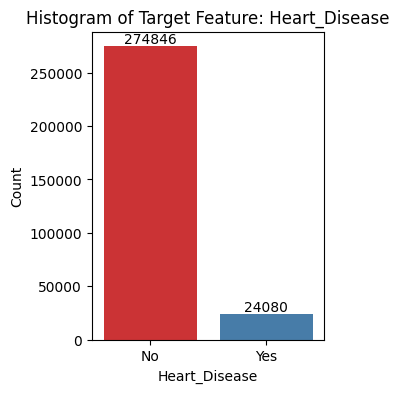

In [50]:
plt.figure(figsize=(3, 4))
ax = sns.countplot(x='Heart_Disease', data=cvd_df, palette='Set1')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{count}',
            ha='center', va='bottom', fontsize=10, color='black')
plt.title('Histogram of Target Feature: Heart_Disease')
plt.xlabel('Heart_Disease')
plt.ylabel('Count')
plt.show()

Another point we have noticed is that the age distribution in the data set differs from that of the US general population. The data set is more skewed to the elderly.

We believe this is generally acceptable if the model result is used for application such as heart disease risk assessment (rather than a pure prediction on the whole population), since the elderly will be more concerned about this and therefore more likely to be a potential test subject.

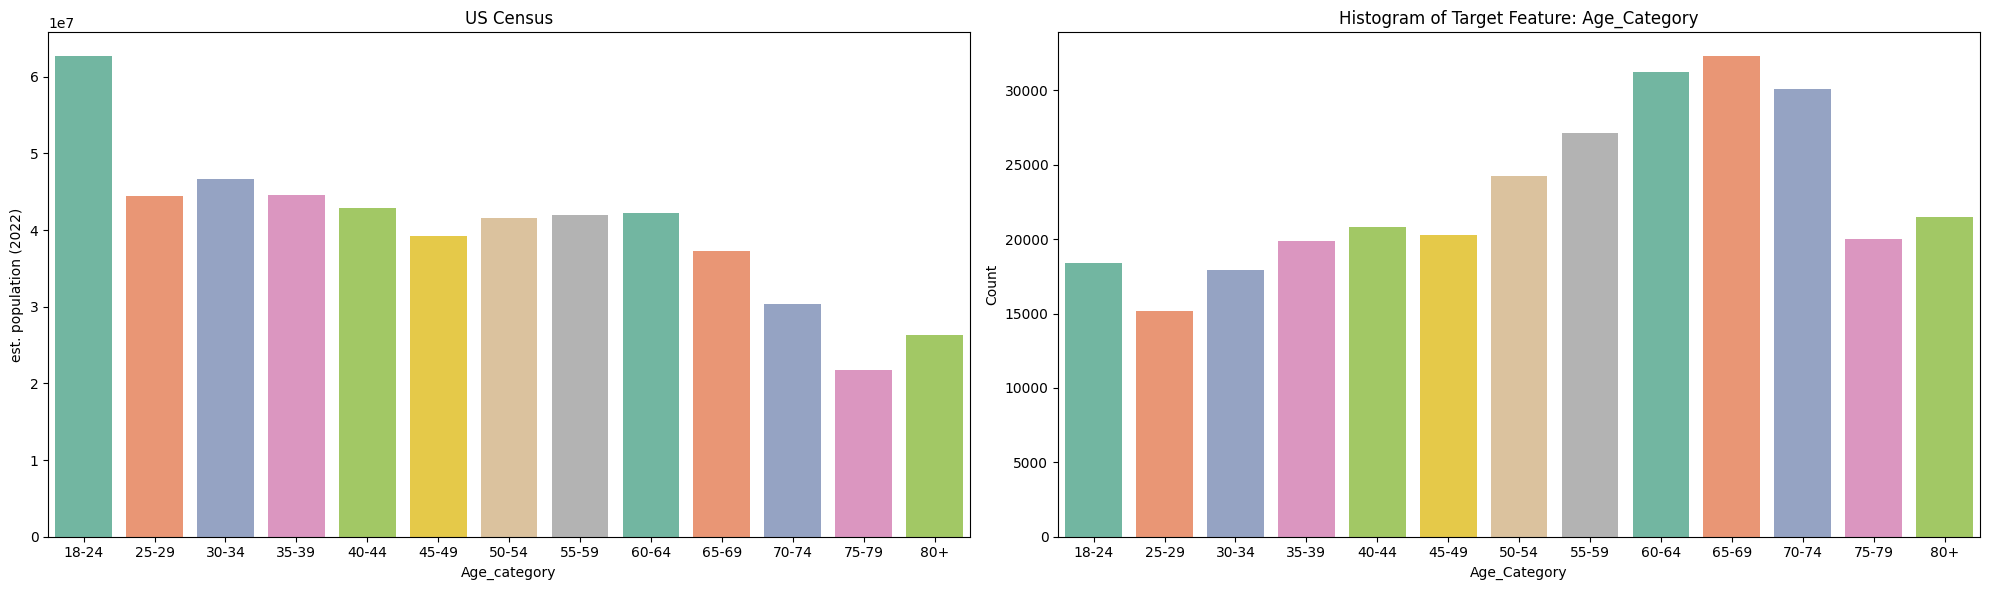

In [51]:
age_cat = [-1, 17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 100]
labels = [f"{x+1}-{y}" for x,y in zip(age_cat, age_cat[1:])]

census_df_plot = census_df.copy()
census_df_plot["Age_category"] = pd.cut(census_df_plot['AGE'], bins=age_cat, labels = labels)
census_df_plot = census_df_plot.groupby('Age_category')[['POPESTIMATE2022']].sum().rename(index={'80-100':'80+'}).reset_index(drop=False)
census_df_plot = census_df_plot[census_df_plot['Age_category'] != '0-17']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
axes = axes.flatten()

sns.barplot(x='Age_category', y='POPESTIMATE2022', ax=ax1, data=census_df_plot, palette='Set2')
ax1.set_xlabel('Age_category')
ax1.set_ylabel('est. population (2022)')
# axes[0].set_xticks(rotation='vertical')
ax1.set_title('US Census')


sns.countplot(x='Age_Category', ax=ax2, data=cvd_df, palette='Set2')
ax2.set_title('Histogram of Target Feature: Age_Category')
ax2.set_xlabel('Age_Category')
ax2.set_ylabel('Count')
# axes[1].xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

###6.3.1 Attempt to Mitigate the data imbalance

In the above sections, we have recognize the data imbalance of the targe attribute. However, given the limit amount of data (~300k tuples), we do not have much choice other than working with the full data set.

Potential solution to the data imbalance issue is **`over-sampling`** and **`under-sampling`** the data. As the `Yes` portion only account for 8% of the data, over-sampling may bring substantial over-fitting problems. Here we take a try with the under-sampling, and try applying the XGBoost model from above.

Please note that after the under-sampling, there will be only ~50k data tuples left, so can potentially be under-fitting.

With Logistic Regression:


In [52]:
# under-sampling
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train_unscaled_uns, y_train_uns = ros.fit_resample(X_train_unscaled, y_train)

X_train_uns = scaler.fit_transform(X_train_unscaled_uns)
X_test_uns = scaler.transform(X_test_unscaled)

In [53]:
# logistic regression
log_reg_uns = LogisticRegression(solver='saga', C=0.01, penalty='l1').fit(X_train_uns, y_train_uns)

y_train_uns_proba = log_reg_uns.predict_proba(X_train_uns)[:, 1]
y_test_uns_proba = log_reg_uns.predict_proba(X_test_uns)[:, 1]

auc_train_uns = roc_auc_score(y_train_uns, y_train_uns_proba)
auc_test_uns = roc_auc_score(y_test, y_test_uns_proba)

print(f"Train AUROC: {auc_train_uns}, Test AUROC: {auc_test_uns}")

Train AUROC: 0.8147540473219146, Test AUROC: 0.8115774568416718


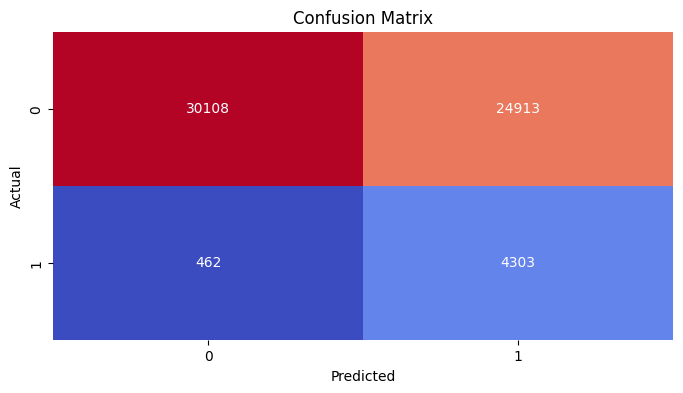

In [54]:
y_pred_uns = log_reg_uns.predict(X_test)
cm_uns = confusion_matrix(y_test, y_pred_uns)
plt.figure(figsize=(8, 4))
sns.heatmap(cm_uns, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

With XGBoost:

In [55]:
# XGBoost
param_grid = {"eta": 0.2, "max_depth": 4, "gamma": 1}

clf_uns = xgb.XGBClassifier(**params)
clf_uns.fit(X_train_uns, y_train_uns)

y_train_unsxg_proba = clf_uns.predict_proba(X_train_uns)[:, 1]
y_test_unsxg_proba = clf_uns.predict_proba(X_test)[:, 1]

auc_train_unsxg = roc_auc_score(y_train_uns, y_train_unsxg_proba)
auc_test_unsxg = roc_auc_score(y_test, y_test_unsxg_proba)

print(f"Train AUROC: {auc_train_unsxg}, Test AUROC: {auc_test_unsxg}")

Train AUROC: 0.8337062699288584, Test AUROC: 0.7896095992195139


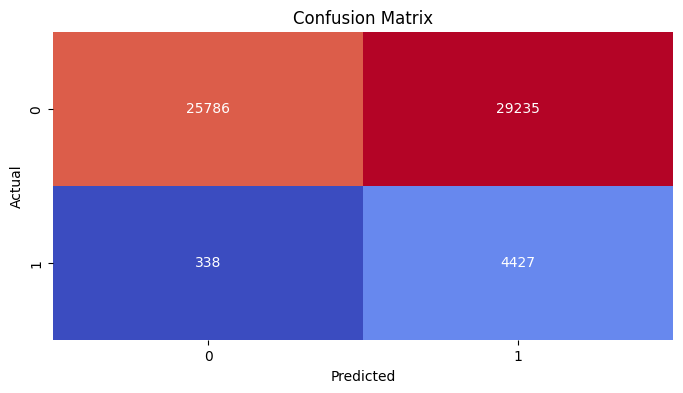


Accuracy: 0.5053524236443314
Precision: 0.13151327906838572
Recall: 0.9290661070304302
F1 Score: 0.2304109089962787


In [56]:
y_pred_unsxg = clf_uns.predict(X_test)
cm_unsxg = confusion_matrix(y_test, y_pred_unsxg)
plt.figure(figsize=(8, 4))
sns.heatmap(cm_unsxg, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred_unsxg)
precision = precision_score(y_test, y_pred_unsxg)
recall = recall_score(y_test, y_pred_unsxg)
f1 = f1_score(y_test, y_pred_unsxg)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

We can see that the false negative decreases, but (1) the false positive also increases; (2) the test accuracy drastically drop, indicating the under-fitting problem we have expected.
Therefore, in this study, given the limited data, we still stick to the model in the previous sections that utilize the full data set.

##6.4 Potential applications and future work

We believe the result from this project can have several potential use cases:


**1.   A risk indicator for heart diseases:** using the model from this study, we can build a "early warning system", which takes in the demographic / health information and recommend those with higher risks to undergo further clinical screening for cardiovascular diseases.

**2.   Pointing out potential research topics:** regarding some interesting (or surprising) findings mentioend above, we may suggest further research on the mechanism behind the correlation with cardiovascular diseases (e.g. depression / mental health conditions, alcohol consumption)

Also, if with more time and resources, it will be helpful to gather more data (so that we can resolve the data imbalance issue better), and data that have better granularity, and more attributes (preferrably objective attributes e.g. clinical data, family medical history etc.). We will also keep it in mind that such data may have deeper privacy concerns and should be handled more carefully and in compliancce with laws and regulations.

